# Big Mart Sales Prediction

### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
warnings.filterwarnings('ignore')

### Loading the dataset

In [ ]:
dataset=pd.read_csv('archive/big_mart_Train.csv')

In [ ]:
dataset.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3810,NCQ30,7.725,LF,0.048661,Household,123.7414,OUT010,1998,NaN,Tier 3,Grocery Store,121.8414
5387,FDS60,20.850,Low Fat,0.032581,Baking Goods,180.0660,OUT018,2009,Medium,Tier 3,Supermarket Type2,2157.1920
8107,FDX16,17.850,Low Fat,0.110153,Frozen Foods,150.2050,OUT010,1998,NaN,Tier 3,Grocery Store,149.8050
2317,NCJ31,19.200,Low Fat,0.182938,Others,243.0196,OUT049,1999,Medium,Tier 1,Supermarket Type1,3615.2940
8441,FDK60,16.500,Regular,0.094010,Baking Goods,95.2068,OUT049,1999,Medium,Tier 1,Supermarket Type1,777.6544


### Finding the shape of the dataset (No. of rows and columns)

In [ ]:
dataset.shape

(8523, 12)

In [ ]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Checking for null values in the dataset

In [ ]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
trainper=dataset.isnull().sum()*100/len(dataset)
trainper

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

### Taking care of duplicated values

In [ ]:
#True=duplicates exist. else, no
dataset.duplicated().any()

False

### Handling missing values

In [ ]:
#Numerical
dataset['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [ ]:
#Categorical
dataset['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

**Filling missing values in the numerical data** <br>
Univariate Imputation - Mean, Median, Mode, Interpolation (nearest tuple values comparison - best), Constant value<br>
Bivariate Imputation - Regression, KNN, Machine learning based

### Univariate Imputation

In [ ]:
mean_weight = dataset['Item_Weight'].mean()
median_weight = dataset['Item_Weight'].median()
print(mean_weight, median_weight)

12.857645184135976 12.6


In [ ]:
dataset['Item_Weight_mean']=dataset['Item_Weight'].fillna(mean_weight)
dataset['Item_Weight_median']=dataset['Item_Weight'].fillna(median_weight)

In [ ]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [ ]:
print("Original Weight variable variance",dataset['Item_Weight'].var())
print("Item Weight variable variance after mean Imputation",dataset['Item_Weight_mean'].var())
print("Item Weight variable variance after median Imputation",dataset['Item_Weight_median'].var())

Original Weight variable variance 21.56168825983637
Item Weight variable variance after mean Imputation 17.860121735060453
Item Weight variable variance after median Imputation 17.869561454073366


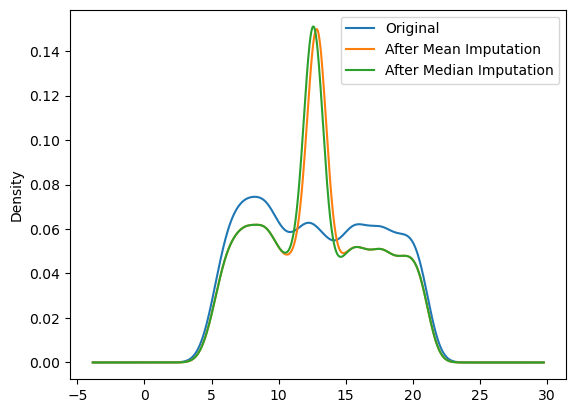

In [ ]:
dataset['Item_Weight'].plot(kind='kde',label='Original')
dataset['Item_Weight_mean'].plot(kind='kde',label='After Mean Imputation')
dataset['Item_Weight_median'].plot(kind='kde',label='After Median Imputation')
plt.legend()
plt.show()
#Variance is too high. Not suitable. Let's go with other imputation methods

<Axes: >

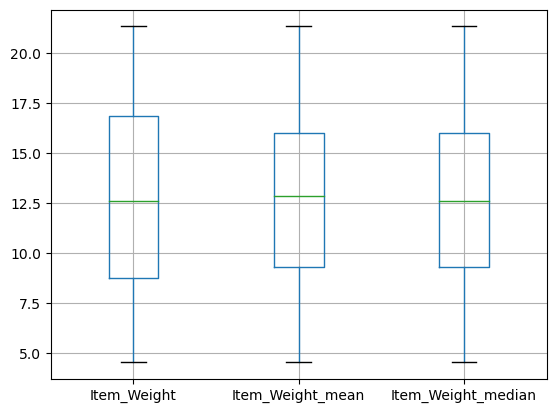

In [ ]:
dataset[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()
#no spread of data is observed

In [ ]:
dataset['Item_Weight_Interpolate']=dataset['Item_Weight'].interpolate(method='linear')

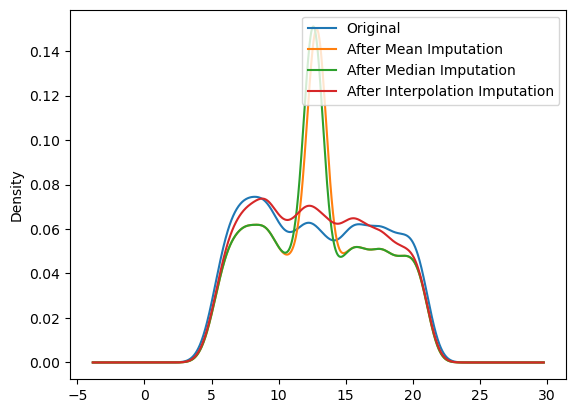

In [ ]:
dataset['Item_Weight'].plot(kind='kde',label='Original')
dataset['Item_Weight_mean'].plot(kind='kde',label='After Mean Imputation')
dataset['Item_Weight_median'].plot(kind='kde',label='After Median Imputation')
dataset['Item_Weight_Interpolate'].plot(kind='kde',label='After Interpolation Imputation')
plt.legend()
plt.show()
#Interpolation has gone on almost same direction as of original data on filling the missing values. So far, the best choice.

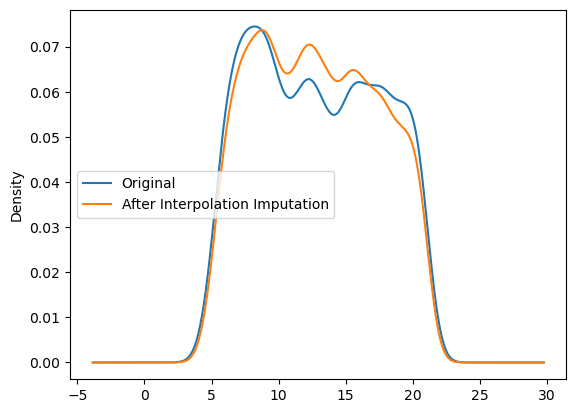

In [ ]:
dataset['Item_Weight'].plot(kind='kde',label='Original')
dataset['Item_Weight_Interpolate'].plot(kind='kde',label='After Interpolation Imputation')
plt.legend()
plt.show()

### Multivariate Imputation

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knn=KNNImputer(n_neighbors=10, weights='distance')

In [ ]:
dataset['KNN-Imputer']=knn.fit_transform(dataset[['Item_Weight']]).ravel()

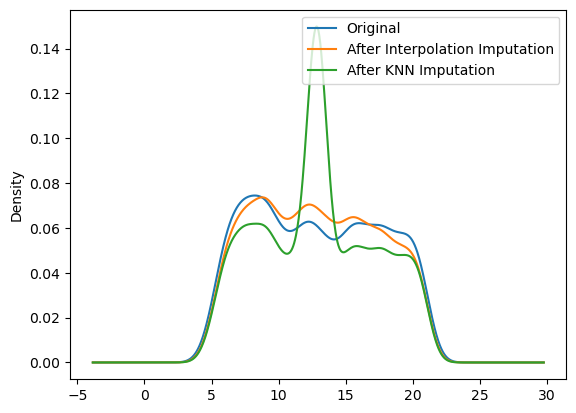

In [ ]:
dataset['Item_Weight'].plot(kind='kde',label='Original')
dataset['Item_Weight_Interpolate'].plot(kind='kde',label='After Interpolation Imputation')
dataset['KNN-Imputer'].plot(kind='kde',label='After KNN Imputation')
plt.legend()
plt.show()
#Even the KNN shows a great variation in between the original and imputed data. So, let us go with interpolation as our fillna method.

In [ ]:
#Let us keep Item_Weight_Interpolate column only and drop the remaining weights
dataset=dataset.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','KNN-Imputer'],axis=1)

In [ ]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Interpolate         0
dtype: int64

### Outlet Size

In [ ]:
dataset['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [ ]:
dataset['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [ ]:
#Outlet size relates with Outlet_type. So, let us fill na values of outlet_size using its relation with outlets_type
mode_outlet=dataset.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [ ]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
missing_values=dataset['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [ ]:
dataset.loc[missing_values,'Outlet_Size'] = dataset.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_outlet[x])

In [ ]:
dataset.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_Interpolate      0
dtype: int64

In [ ]:
dataset.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


### Item_Fat_Content

In [ ]:
dataset.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_Interpolate'],
      dtype='object')

In [ ]:
dataset['Item_Fat_Content'].value_counts()
#Values are irregular. Let us change them to 2 types LF, Regular using python

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
dataset.replace({'Item_Fat_Content':{'Low Fat':'LF', 'low fat':'LF', 'reg': 'Regular'}}, inplace=True)

In [ ]:
dataset['Item_Fat_Content'].value_counts()


Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

### Item Visibility

In [ ]:
dataset.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_Interpolate'],
      dtype='object')

In [ ]:
dataset['Item_Visibility'].value_counts()
#Llots of zeros. Could be missing values. replace them with nan and interpolate to fill those nans with good fit values

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [ ]:
dataset['Item_Visibility_interpolate']=dataset['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [ ]:
dataset['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

In [ ]:
dataset=dataset.drop('Item_Visibility',axis=1)

### Item Type

In [ ]:
dataset.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_Interpolate', 'Item_Visibility_interpolate'],
      dtype='object')

In [ ]:
dataset['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

### Item_Identifier

In [ ]:
dataset.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_Interpolate', 'Item_Visibility_interpolate'],
      dtype='object')

In [ ]:
dataset['Item_Identifier'].value_counts()
#All items start with FD, NC, DR could be food, drinks and non consumeables. Short them down

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [ ]:
dataset['Item_Identifier']=dataset['Item_Identifier'].apply(lambda x:x[:2])

In [ ]:
dataset['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

### Outlet_Establishment_Year

In [ ]:
dataset.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_Interpolate', 'Item_Visibility_interpolate'],
      dtype='object')

In [ ]:
dataset['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [ ]:
#These are years, could make much difference on encoding. So, let us cut them to the age from the current year
import datetime as dt

In [ ]:
current_year=dt.datetime.today().year
current_year

2023

In [ ]:
dataset['Outlet_Age']=current_year-dataset['Outlet_Establishment_Year']

In [ ]:
dataset.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate,Outlet_Age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,24


In [ ]:
dataset=dataset.drop('Outlet_Establishment_Year',axis=1)
dataset.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate,Outlet_Age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,24


### Handling Categorical Columns

In [ ]:
#For handling dependent (Prediction class Y values), we use one hot encoder,
#but since we have independent categorical values here, we need to use OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
data_encoded = dataset.copy()
categorical_cols=dataset.select_dtypes(include=['object'])
for col in categorical_cols:
    ord_enc = OrdinalEncoder()
    data_encoded[col]=ord_enc.fit_transform(data_encoded[[col]])
    print(ord_enc.categories_)


[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [ ]:
data_encoded.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.138,9.3,0.016047,24


In [ ]:
#Splitting the trainset data into classes X and y
X=data_encoded.drop('Item_Outlet_Sales',axis=1)
y=data_encoded['Item_Outlet_Sales']

In [ ]:
X.shape

(8523, 11)

In [ ]:
y.shape

(8523,)

In [ ]:
X.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_Interpolate,Item_Visibility_interpolate,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.30,0.016047,24
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.92,0.019278,14
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.50,0.016760,24
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.20,0.015755,25
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.93,0.014751,36


In [ ]:
y.head(5)

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(n_estimators=100,random_state=42)
scores=cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5549992903957147


### XGBRFRegressor

In [ ]:
from xgboost import XGBRFRegressor
xg=XGBRFRegressor(n_estimators=100,random_state=42)
scores=cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5954067732342189


### XGBRFRegressor Important features extraction

In [ ]:
xg=XGBRFRegressor(n_estimators=100,random_state=42)
xg1=xg.fit(X,y)
pd.DataFrame({
    'feature': X.columns,
    'XGBRF_importance':xg1.feature_importances_
}).sort_values(by='XGBRF_importance', ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.349864
5,Outlet_Size,0.192658
10,Outlet_Age,0.175040
3,Item_MRP,0.131012
4,Outlet_Identifier,0.130735
6,Outlet_Location_Type,0.013184
9,Item_Visibility_interpolate,0.002493
8,Item_Weight_Interpolate,0.001770
2,Item_Type,0.001566
0,Item_Identifier,0.000999


In [ ]:
['Outlet_Location_Type','Item_Visibility_interpolate','Item_Weight_Interpolate','Item_Type','Item_Identifier','Item_Fat_Content']

['Outlet_Location_Type',
 'Item_Visibility_interpolate',
 'Item_Weight_Interpolate',
 'Item_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [ ]:
from xgboost import XGBRFRegressor
xg=XGBRFRegressor(n_estimators=100,random_state=42)
scores=cross_val_score(xg1,X.drop(['Outlet_Location_Type','Item_Visibility_interpolate','Item_Weight_Interpolate','Item_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5966037632320667


In [ ]:
final_dataset=X.drop(columns=['Outlet_Location_Type','Item_Visibility_interpolate','Item_Weight_Interpolate','Item_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [ ]:
final_dataset.head(5)

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Age
0,249.8092,9.0,1.0,1.0,24
1,48.2692,3.0,1.0,2.0,14
2,141.6180,9.0,1.0,1.0,24
3,182.0950,0.0,2.0,0.0,25
4,53.8614,1.0,0.0,1.0,36


### Best Model

In [ ]:
from xgboost import XGBRFRegressor
xg_final=XGBRFRegressor()

In [ ]:
xg_final.fit(final_dataset,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_dataset,y,test_size=0.2,random_state=42)

In [ ]:
xg_final.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
y_pred=xg_final.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

713.9516489619299

### Prediction on unseen data

In [ ]:
prediction = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(prediction)
print("Sales Value is in between {} and {}".format(prediction-713.9516, prediction+713.9516))

2067.0864
Sales Value is in between 1353.1348257812501 and 2781.03802578125


### Saving Model using joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(xg_final,'bigmart_sales_prediction')

['bigmart_sales_prediction']

In [ ]:
model=joblib.load('bigmart_sales_prediction')

### Construction of GUI

In [ ]:
import numpy as np
import datetime as dt
from tkinter import *
import joblib
current_year = dt.datetime.today().year
def show_entry_fields():
    p1=float(e1.get())
    #p4=float(e4.get())

    text = clicked.get()
    if text == "OUT010":
        p2=0
        print(p2)
    elif text=="OUT013":
        p2=1
        print(p2)
    elif text=="OUT017":
        p2=2
        print(p2)
    elif text=="OUT018":
        p2=3
        print(p2)
    elif text=="OUT019":
        p2=4
        print(p2)
    elif text=="OUT027":
        p2=5
        print(p2)
    elif text=="OUT035":
        p2=6
        print(p2)
    elif text=="OUT045":
        p2=7
        print(p2)
    elif text=="OUT046":
        p2=8
        print(p2)
    elif text=="OUT049":
        p2=9
        print(p2)
    text0 = clicked0.get()
    if text0 == "High":
        p3=0
        print(p3)
    elif text0=="Medium":
        p3=1
        print(p3)
    elif text0=="Small":
        p3=2
        print(p3)

    text1 = clicked1.get()
    if text1 == "Supermarket Type1":
        p4=1
        print(p4)
    elif text1=="Supermarket Type2":
        p4=2
        print(p4)
    elif text1=="Supermarket Type3":
        p4=3
        print(p4)
    elif text1=="Grocery Store":
        p4=0
        print(p4)

    p5=current_year - int(e5.get())
    print(p5)

    model = joblib.load('bigmart_model')
    result=model.predict(np.array([[p1,p2,p3,p4,p5]]))
    Label(master, text="Sales").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Sales amount", result)

master = Tk()
master.title("Big Mart Sales Prediction using Machine Learning")


label = Label(master, text = " Big Mart Sales Prediction using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

# Item_MRP	Outlet_Identifier	Outlet_Size	Outlet_Type	Outlet_age
Label(master, text="Item_MRP").grid(row=1)
Label(master, text="Outlet_Identifier").grid(row=2)
Label(master, text="Outlet_Size").grid(row=3)
Label(master, text="Outlet_Type").grid(row=4)
Label(master, text="Outlet_Establishment_Year").grid(row=5)


clicked = StringVar()
options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049']

clicked0 = StringVar()

options0 = ['High', 'Medium', 'Small']

clicked1 = StringVar()
options1 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']

e1 = Entry(master)

e2 = OptionMenu(master , clicked , *options )
e2.configure(width=15)


e3 = OptionMenu(master , clicked0 , *options0 )
e3.configure(width=15)


e4 = OptionMenu(master , clicked1 , *options1 )
e4.configure(width=15)

e5 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()